In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df=pd.read_csv("data/StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y

In [5]:
X = df.drop(columns=['math score'], axis=1)

In [8]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y=df['math score']

In [11]:
# creating transformer
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# import preprocessimg
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
cal_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cal_transformer, cat_features),
        ("StandardScaler", num_transformer, num_features)
    ]
)

In [13]:
X= preprocessor.fit_transform(X)

In [14]:
X.shape

(1000, 19)

- seperating the data into training and test dataset

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

- Evaluation matrics

In [36]:
def evaluation_metrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    # mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_squre= r2_score(true, predicted)
    return mae, rmse, r2_squre

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [48]:

model_list = []
results =[]

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # make predications
    y_train_preds=model.predict(X_train)
    y_test_preds= model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluation_metrics(y_train, y_train_preds)

    model_test_mae , model_test_rmse, model_test_r2 = evaluation_metrics(y_test, y_test_preds)
    
    print(model_name)
    model_list.append(list(model_name))
    results.append({"Model": model_name, "R2 Score": model_test_r2})

    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

In [49]:
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="R2 Score", ascending=False)



In [50]:
print(df_results)


                     Model  R2 Score
2                    Ridge  0.880593
0        Linear Regression  0.880345
5  Random Forest Regressor  0.854184
7    CatBoosting Regressor  0.851632
8       AdaBoost Regressor  0.848243
6             XGBRegressor  0.827797
1                    Lasso  0.825320
3    K-Neighbors Regressor  0.783813
4            Decision Tree  0.733437


### Linear regression

In [51]:
best_model = LinearRegression(fit_intercept=True)
# fit intercept works as a fir the data on constant term (value of independent variable when all independent values at 0)
best_model.fit(X_train,y_train)
y_pred= model.predict(X_test)
score =r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 84.82


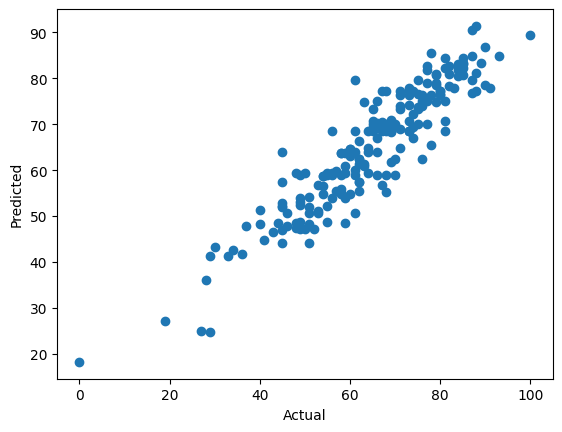

In [52]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

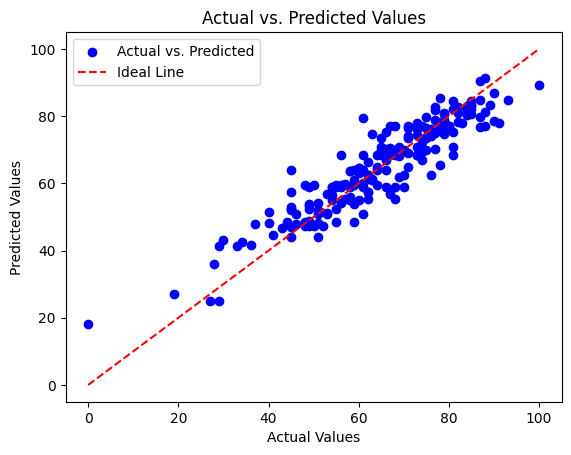

In [53]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Show legend with labels

plt.title('Actual vs. Predicted Values')
plt.show()


In [54]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,77.901961,13.098039
737,53,56.803965,-3.803965
740,80,77.145729,2.854271
660,74,77.176471,-3.176471
411,84,82.623656,1.376344
...,...,...,...
408,52,47.239130,4.760870
332,62,55.396552,6.603448
208,74,66.977778,7.022222
613,65,68.520833,-3.520833
